In [1]:
import pandas as pd
import numpy as np

## a. Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner

In [2]:
tandem1=pd.read_csv("201803-fordgobike-tripdata.csv")
tandem2=pd.read_csv("201807-fordgobike-tripdata.csv")
tandem3=pd.read_csv("201811-fordgobike-tripdata.csv")
tandem4=pd.read_csv("201812-fordgobike-tripdata.csv")

In [3]:
print(tandem1.info())
print(tandem2.info())
print(tandem3.info())
print(tandem4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111382 entries, 0 to 111381
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             111382 non-null  int64  
 1   start_time               111382 non-null  object 
 2   end_time                 111382 non-null  object 
 3   start_station_id         111382 non-null  int64  
 4   start_station_name       111382 non-null  object 
 5   start_station_latitude   111382 non-null  float64
 6   start_station_longitude  111382 non-null  float64
 7   end_station_id           111382 non-null  int64  
 8   end_station_name         111382 non-null  object 
 9   end_station_latitude     111382 non-null  float64
 10  end_station_longitude    111382 non-null  float64
 11  bike_id                  111382 non-null  int64  
 12  user_type                111382 non-null  object 
 13  member_birth_year        102347 non-null  float64
 14  memb

In [4]:
tandem=pd.concat([tandem1,tandem2,tandem3,tandem4],axis=0)
tandem.shape

(576102, 16)

In [5]:
#tandem=pd.read_csv("2013-10 - Citi Bike trip data.csv")
tandem.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


## b. What was the time duration for the average trip taken? (Use plotting techniques and write your observations for the same.)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
tandem['duration_sec'].head()

0    71766
1    62569
2    56221
3    85844
4     1566
Name: duration_sec, dtype: int64

/tmp/ipykernel_6281/2462533375.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tandem['duration_sec'],hist=None,label='Trip Duration in sec')


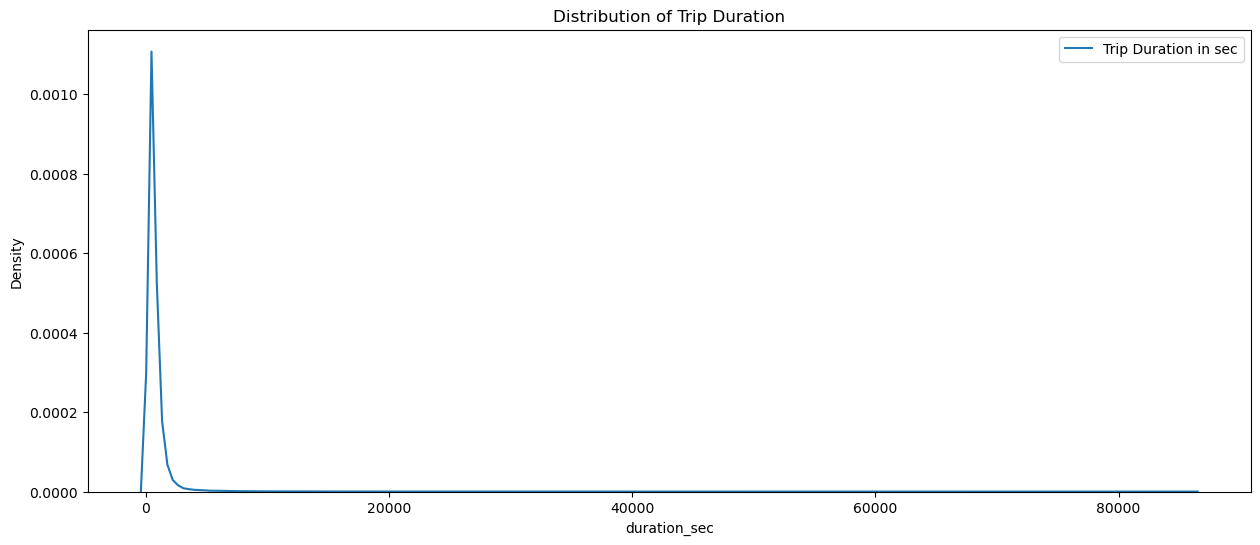

In [8]:
plt.figure(figsize=(15,6))
sns.distplot(tandem['duration_sec'],hist=None,label='Trip Duration in sec')
plt.legend()
plt.title("Distribution of Trip Duration")

plt.show()

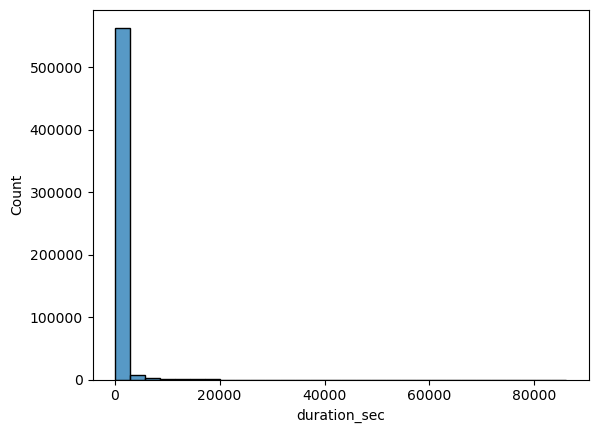

In [10]:
sns.histplot(tandem['duration_sec'],bins=30)
plt.show()

In [12]:
tandem['duration_sec'].describe()

count    576102.000000
mean        834.430427
std        2213.645158
min          61.000000
25%         346.000000
50%         549.000000
75%         861.000000
max       86039.000000
Name: duration_sec, dtype: float64

In [15]:
'''Conclusion:
    Based on my observations, the time duration for the average trip taken is 834.43 sec but maximum records are 
    between the range of 61 sec to ~2500 sec. In given dataset some Outliers may be exist by looking at mean. 
'''

'Conclusion:\n    Based on my observations, the time duration for the average trip taken is 834.43 sec but maximum records are \n    between the range of 61 sec to ~2500 sec. In given dataset some Outliers may be exist by looking at mean. \n'

### c. Is there any correlation between the months and the trip duration? Use scatter plot and comment your observations from the plot

In [17]:
tandem['start_time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 576102 entries, 0 to 131362
Series name: start_time
Non-Null Count   Dtype 
--------------   ----- 
576102 non-null  object
dtypes: object(1)
memory usage: 8.8+ MB


In [19]:
tandem['trip_month']=pd.to_datetime(tandem['start_time'])
tandem['trip_month']=tandem['trip_month'].map(lambda x: x.month)
tandem.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No,3
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No,3
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No,3
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No,3
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No,3


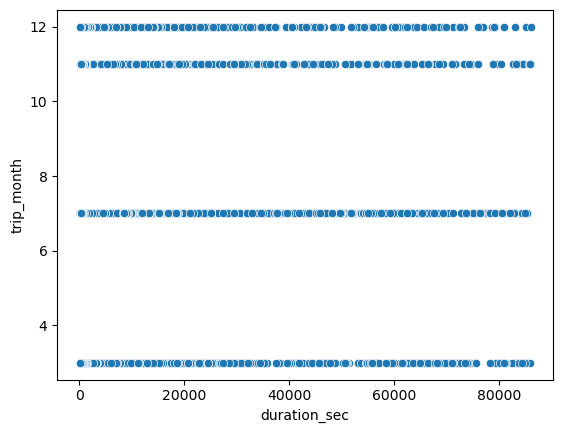

In [20]:
sns.scatterplot(x=tandem['duration_sec'],y=tandem['trip_month'])
plt.show()

In [21]:
'''Conclusion:
    Based on my observations, There is no Correlation between the months and the trip duration.
'''

'Conclusion:\n    Based on my observations, There is no Correlation between the months and the trip duration.\n'

### d. Do seasons affect the duration of a trip ? Comment your observations.

In [22]:
'''Conclusion:
    Based on my observations, dataset contains record of only 4 months, so the given dataset does not have sufficient
    data to analyse that seasons really does affect duration of a trip or not.
'''

'Conclusion:\n    Based on my observations, dataset contains record of only 4 months, so the given dataset does not have sufficient\n    data to analyse that seasons really does affect duration of a trip or not.\n'

### e. Using multivariate exploration, explain whether there is any relation between short trips and the users.

In [23]:
tandem.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No,3
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No,3
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No,3
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No,3
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No,3


In [24]:
#short_trips=tandem[tandem['tripduration']<400] # We consider short trip as upto 400 Seconds

In [25]:
tandem['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

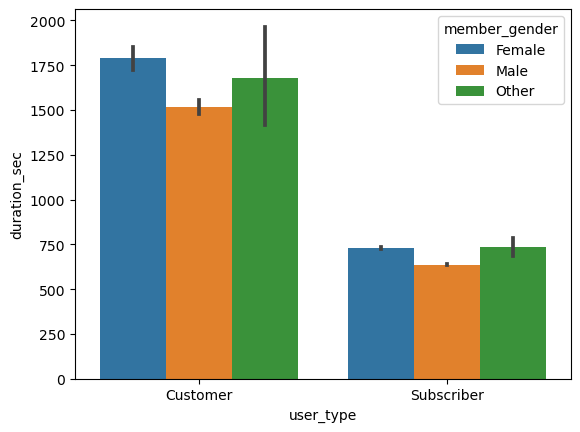

In [26]:
sns.barplot(x=tandem['user_type'],y=tandem['duration_sec'],hue=tandem['member_gender'])
plt.show()

In [27]:
'''Conclusion:
    Based on my observations, there is a relation between short trips and the users. Users who are 'Subscriber' tends
    to go on short trips more often and Gender does not affect on trip duration.
'''

"Conclusion:\n    Based on my observations, there is a relation between short trips and the users. Users who are 'Subscriber' tends\n    to go on short trips more often and Gender does not affect on trip duration.\n"

### Question Number 2:

### a. Create a Matrix between 0 and 1, with each value difference of 0.01.


In [34]:
a=np.arange(0,1,0.01).reshape(10,10)
a

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
       [0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29],
       [0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39],
       [0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49],
       [0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59],
       [0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69],
       [0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79],
       [0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89],
       [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]])

### b. Create an array of 20 linearly spaced points between 0 and 1.


In [37]:
a=np.linspace(0.001,1,20)
a

array([0.001     , 0.05357895, 0.10615789, 0.15873684, 0.21131579,
       0.26389474, 0.31647368, 0.36905263, 0.42163158, 0.47421053,
       0.52678947, 0.57936842, 0.63194737, 0.68452632, 0.73710526,
       0.78968421, 0.84226316, 0.89484211, 0.94742105, 1.        ])

### c. Create a 5*5 matrix using range 1 to 26, and return sum of the matrix, standard deviation and sum of all the columns of the matrix.

In [38]:
m=np.arange(1,26).reshape(5,5)
m

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [39]:
m.sum()

325

In [40]:
m.std()

7.211102550927978

In [42]:
m.sum(axis=0)

array([55, 60, 65, 70, 75])

### Question Number 3:
### import numpy as np
### x = np.arange(0,100)
### y = x*2
### z = x**2
### a. Create a figure object and axis of the figure canvas at axis1 = [0,0,1,1]. Provide necessary labels and title to the plot.

In [43]:
x=np.arange(0,100)
y=x*2
z=x**2

In [44]:
print("x= ",x)
print("y= ",y)
print("z= ",z)

x=  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
y=  [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198]
z=  [   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681
 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2

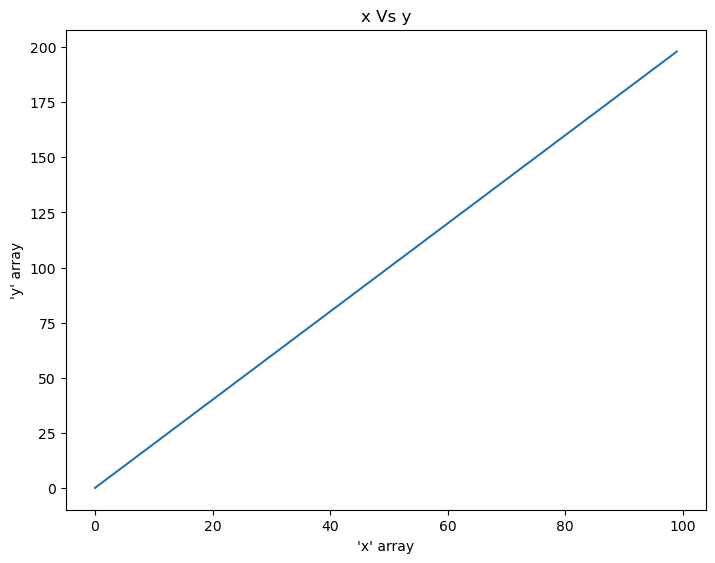

In [68]:
fig=plt.figure()
axis1=fig.add_axes([0,0,1,1])
axis1.plot(x,y)
axis1.set_ylabel("'y' array")
axis1.set_xlabel("'x' array")
axis1.set_title('x Vs y')
fig.canvas.draw()

### b. Create another plot at axis1 = [0,0,1,1] and axis2 = [0.2,0.5,0.2,0.2]

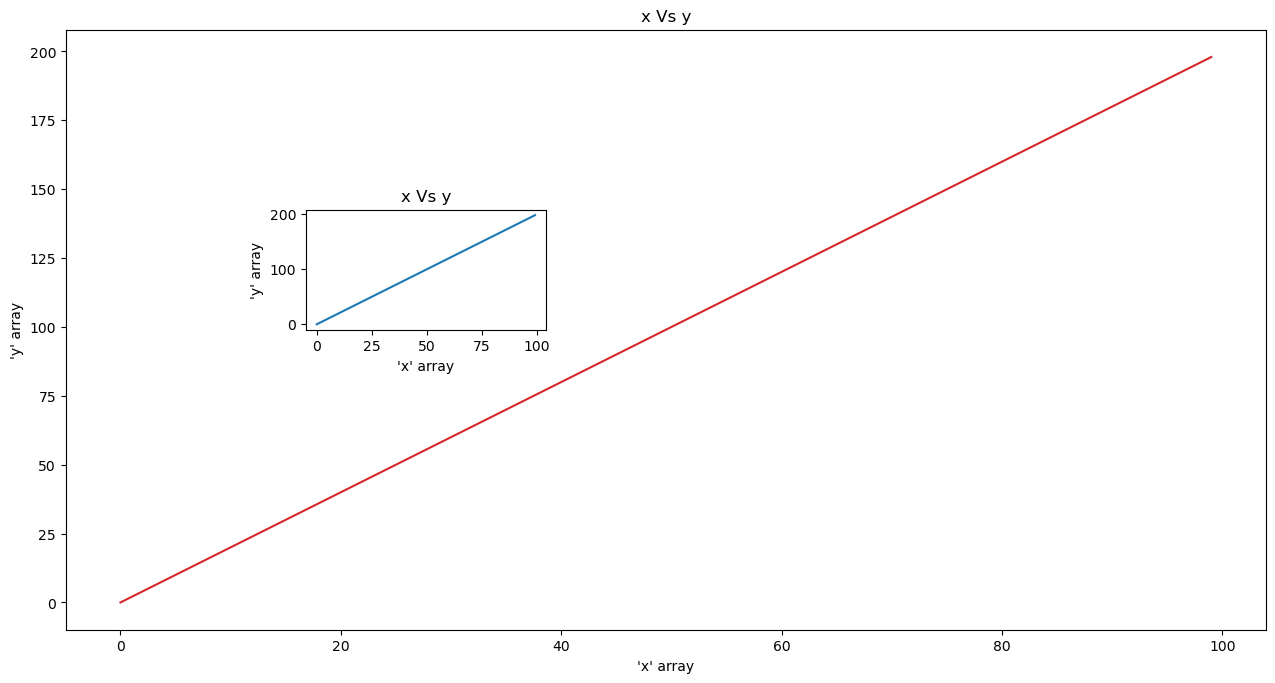

In [75]:
fig=plt.figure(figsize=(12,6))
axis1=fig.add_axes([0,0,1,1])
axis1.plot(x,y,color='tab:red')
axis1.set_ylabel("'y' array")
axis1.set_xlabel("'x' array")
axis1.set_title('x Vs y')

axis2=fig.add_axes([0.2,0.5,0.2,0.2])
axis2.plot(x,y)
axis2.set_ylabel("'y' array")
axis2.set_xlabel("'x' array")
axis2.set_title('x Vs y')

fig.canvas.draw()

### c. Create a plot by adding two axis object at [0,0,1,1] & [0.2,0.5,0.4,0.4]


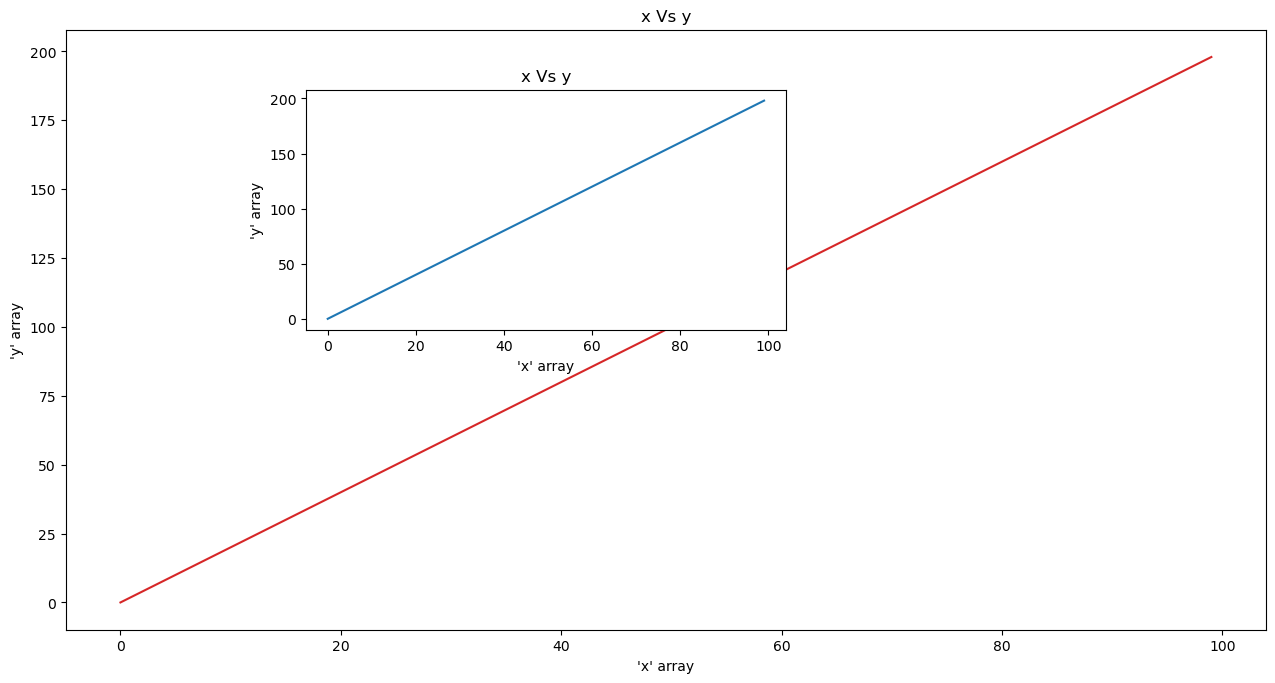

In [76]:
fig=plt.figure(figsize=(12,6))
axis1=fig.add_axes([0,0,1,1])
axis1.plot(x,y,color='tab:red')
axis1.set_ylabel("'y' array")
axis1.set_xlabel("'x' array")
axis1.set_title('x Vs y')

axis2=fig.add_axes([0.2,0.5,0.4,0.4])
axis2.plot(x,y)
axis2.set_ylabel("'y' array")
axis2.set_xlabel("'x' array")
axis2.set_title('x Vs y')

fig.canvas.draw()

### d. Use x, y, z array to create the plots
### i. Between x and z arrays
### ii. Between x & y arrays by setting the x-limit in range 20-22 and y-limit range in 30-50

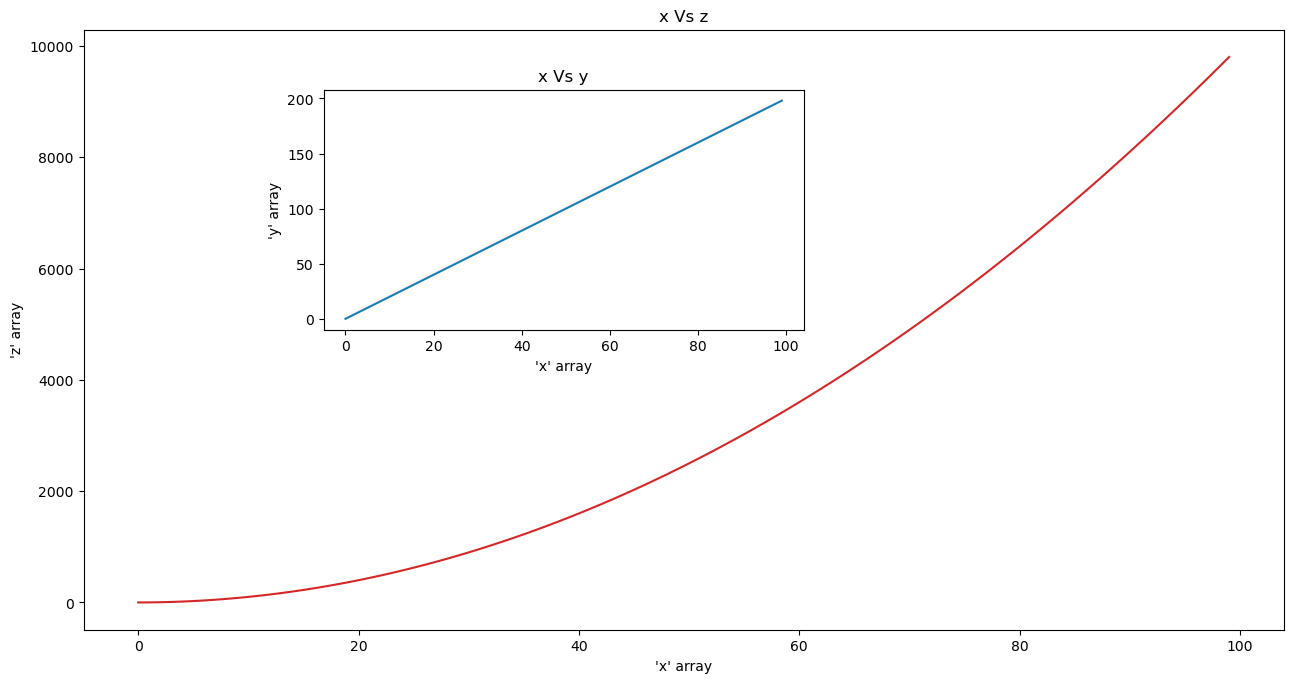

In [72]:
fig=plt.figure(figsize=(12,6))
axis1=fig.add_axes([0,0,1,1])
axis1.plot(x,z,color='tab:red')
axis1.set_ylabel("'z' array")
axis1.set_xlabel("'x' array")
axis1.set_title('x Vs z')

axis2=fig.add_axes([0.2,0.5,0.4,0.4])
axis2.plot(x,y)
axis2.set_ylabel("'y' array")
axis2.set_xlabel("'x' array")
axis2.set_title('x Vs y')

fig.canvas.draw()

## Question Number 4: The purchase analysis of walmart.

In [78]:
wallmart=pd.read_csv("walmart_purchase_data.csv")
wallmart.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


### a. What is the average Purchase Price?

In [81]:
print("Average Purchase Price = ",wallmart['Purchase Price'].mean())

Average Purchase Price =  50.347302


### b. What were the highest and lowest purchase prices?

In [82]:
print("Highest Purchase Price = ",wallmart['Purchase Price'].max())
print("Lowest Purchase Price = ",wallmart['Purchase Price'].min())

Highest Purchase Price =  99.99
Lowest Purchase Price =  0.0


### c. How many people have English 'en' as their Language of choice on the website?

In [96]:
print("Count of people have English 'en' as their Language of choice on the website=")
print(wallmart[wallmart['Language']=='en']['Lot'].count())

Count of people have English 'en' as their Language of choice on the website=
1098


### d. What is the email of the person with the following Credit Card Number: 4926535242672853

In [94]:
print("email of the person with the following Credit Card Number 4926535242672853 is")
print(wallmart[wallmart['Credit Card']==4926535242672853]['Email'].values[0])

email of the person with the following Credit Card Number 4926535242672853 is
bondellen@williams-garza.com


### e. Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction?

In [101]:
print("a purchase that came from Lot: '90 WT' ,the Purchase Price for this transaction was ")
print(wallmart[wallmart['Lot']=='90 WT']['Purchase Price'].values[0])

a purchase that came from Lot: '90 WT' ,the Purchase Price for this transaction was 
75.1


### f. How many people have American Express as their Credit Card Provider and made a purchase above $95 ?

In [104]:
print("Count of people have American Express as their Credit Card Provider and made a purchase above $95 is ")
print(wallmart[(wallmart['CC Provider']=='American Express') & (wallmart['Purchase Price']>95)].count()['Lot'])

Count of people have American Express as their Credit Card Provider and made a purchase above $95 is 
39


### g. How many people have a credit card that expires in 2025?

In [107]:
print("Count of people have a credit card that expires in 2025 is ")
print(wallmart[wallmart['CC Exp Date']==2025]['Lot'].count())

Count of people have a credit card that expires in 2025 is 
0


### h. What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com,etc...) ?

In [112]:
wallmart['Email_host']=wallmart['Email'].map(lambda x: x.split('@')[1])
wallmart.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Email_host
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,morales-harrison.com
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,olson-robinson.info
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,gmail.com


In [117]:
print("the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com,etc...)")
wallmart.groupby('Email_host')['Email'].count().sort_values(ascending=False).head()

the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com,etc...)


Email_host
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

### i. What are the 5 most common Job Titles?

In [121]:
print("the 5 most common Job Titles are ")
wallmart.groupby('Job')['Lot'].count().sort_values(ascending=False).head()

the 5 most common Job Titles are 


Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Designer, jewellery                  27
Research officer, political party    27
Name: Lot, dtype: int64

### j. How many people made the purchase during morning and evening time?

In [128]:
print("Count of people who made the purchase during morning time is ")
print(wallmart.groupby('AM or PM')['Lot'].count().values[0])
print("Count of people who made the purchase during evening time is ")
print(wallmart.groupby('AM or PM')['Lot'].count().values[1])
print("\n\n",wallmart.groupby('AM or PM')['Lot'].count())

Count of people who made the purchase during morning time is 
4932
Count of people who made the purchase during evening time is 
5068


 AM or PM
AM    4932
PM    5068
Name: Lot, dtype: int64
